### Chapter 2 - Basic Charting

# Table of Contents

2.1 Matplotlib Architecture

- Backend Layer
- Artist Layer
- Scripting Layer (pylot)

2.2 Basic Plotting with Matplotlib

- 


# 2.1 Matplotlib Architecture

## 1. Backend Layer

- Deals with the rendering of plots to screen or files
- In Jupyter notebooks, we use the inline backend

## 2. Artist Layer

- Contains containers such as Figure, Subplot, and Axes
- Contains primitives, such as a Line2D and Rectangle, and collections, such as a PathCollection

## 3. Scripting Layer (pyplot)

- Simplifies access to the Artist and Backend layers

**JavaScript library, D3.JS:** a declarative information visualization method  
**matplotlib's pyplot:** a procedural information visualization method  


#### Note:

1. pylot is going to retrieve the current figure with the function **gcf()**, and then get the current axis with the function **gca()**.  
  pyplot is keeping track of the axis objects for you.
  
2. pyplot just mirros the API of the axis objects, so you can call the **plot()** function against the pyplot module,  
   but this is calling the axis plot functions underneath, so be aware.
   
3. The function declaration from most of the functions in matplotlib end with **an open set of keyword** arguments.  
   There are a lot of different properties you can control through these keyword arguments.



# 2.2 Basic Plotting with Matplotlib

plt.plot()

In [4]:
%matplotlib notebook

In [5]:
import matplotlib as mpl
mpl.get_backend()


'nbAgg'

In [6]:
import matplotlib.pyplot as plt
plt.plot?


<IPython.core.display.Javascript object>


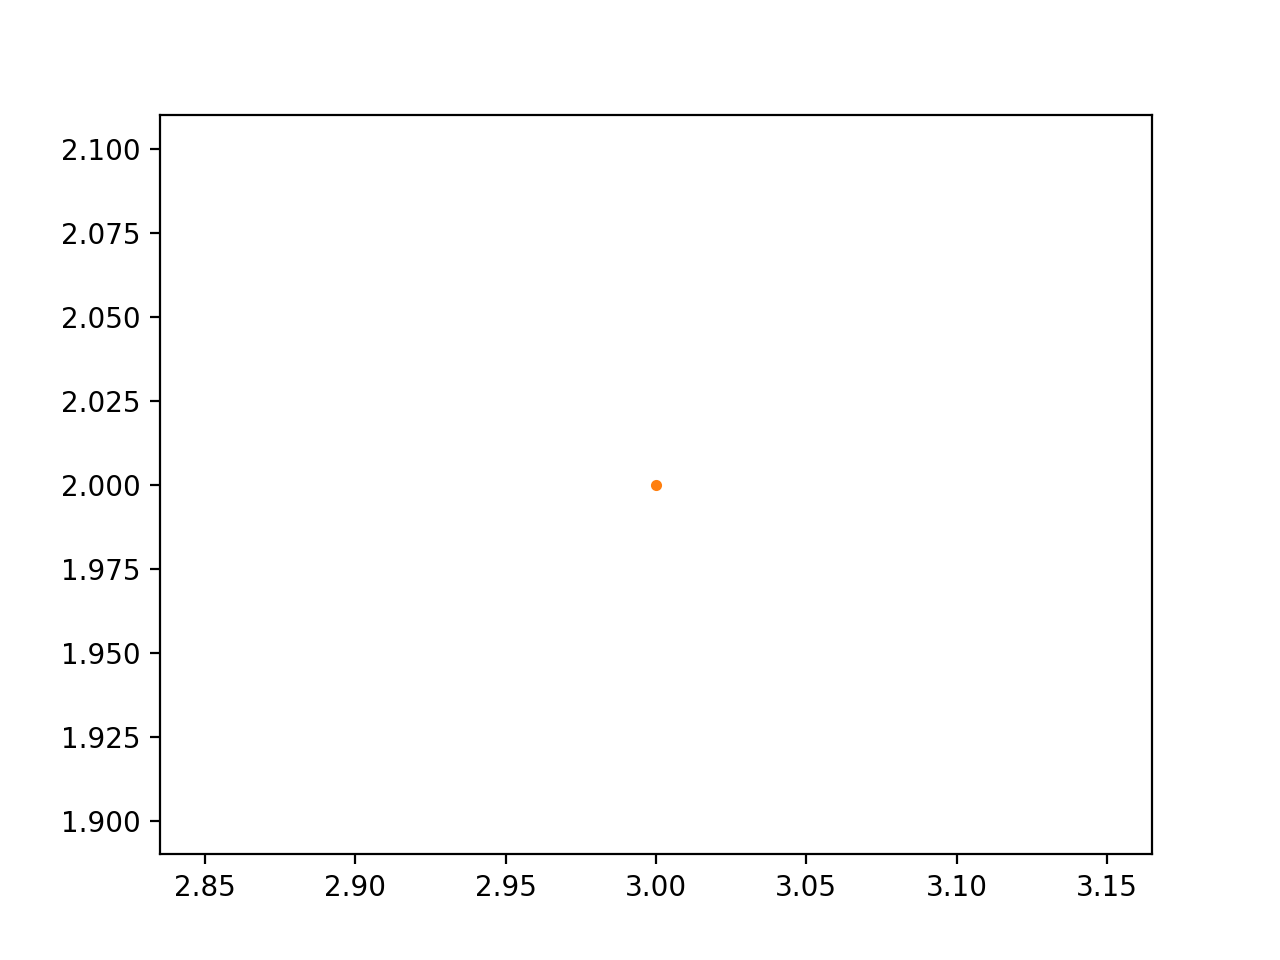

In [7]:
plt.plot(3, 2)


In [8]:
plt.plot(3, 2, '.')    # It updated the visulization above (added the dot)


#### Another way:

In [11]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3, 2, '.')
canvas.print_png('test.png')


In [12]:
%%html
<img src='test.png' />


####  Creating a new figure. Won't update the plot above.

.axis()

<IPython.core.display.Javascript object>


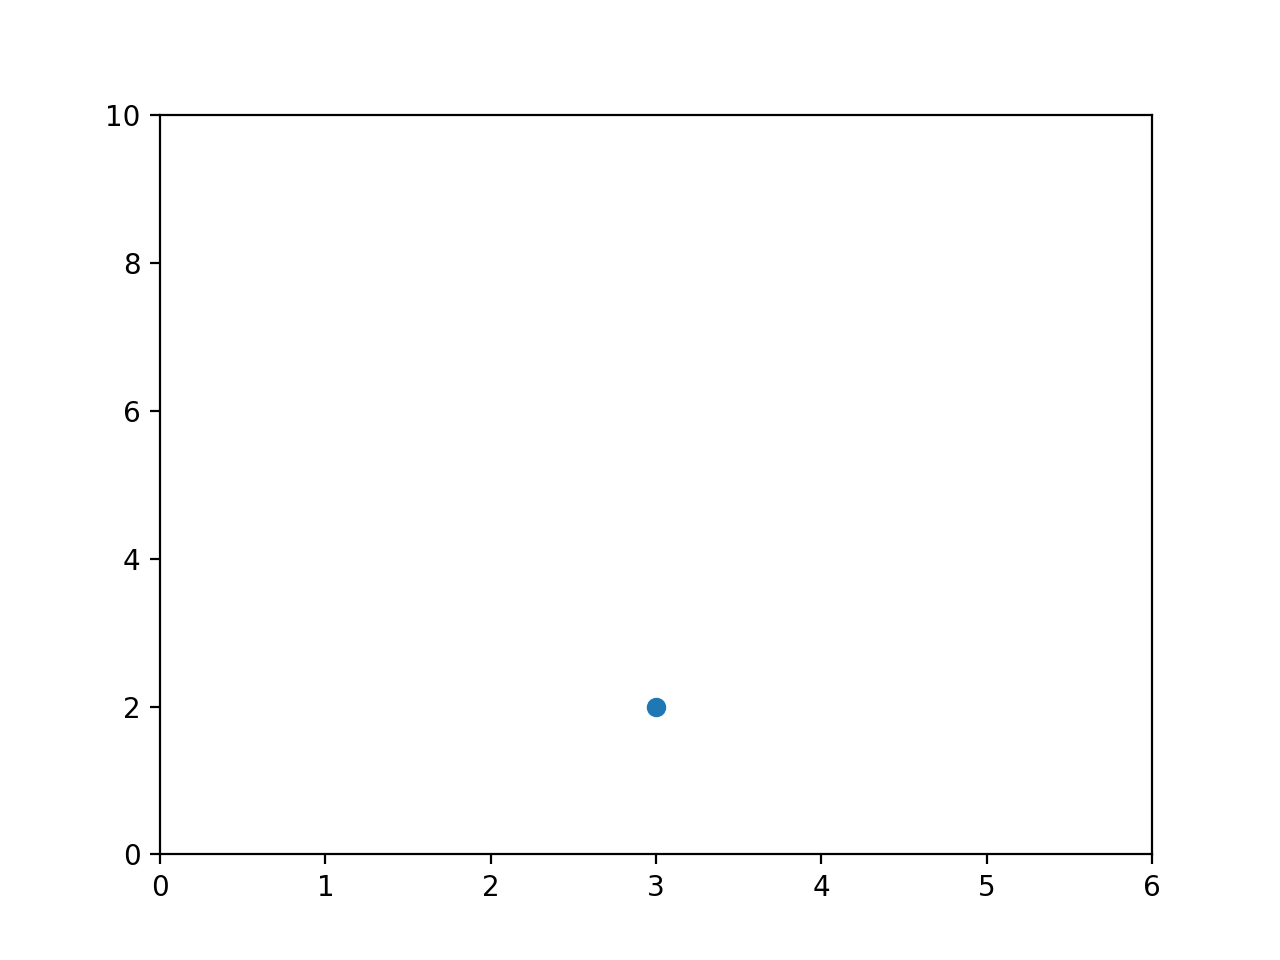

[0, 6, 0, 10]

In [13]:
plt.figure()
plt.plot(3, 2, 'o')

ax = plt.gca()
ax.axis([0, 6, 0, 10])   # x_min = 0, x_max = 6, y_min = 0, y_max = 10


#### Another example:

<IPython.core.display.Javascript object>


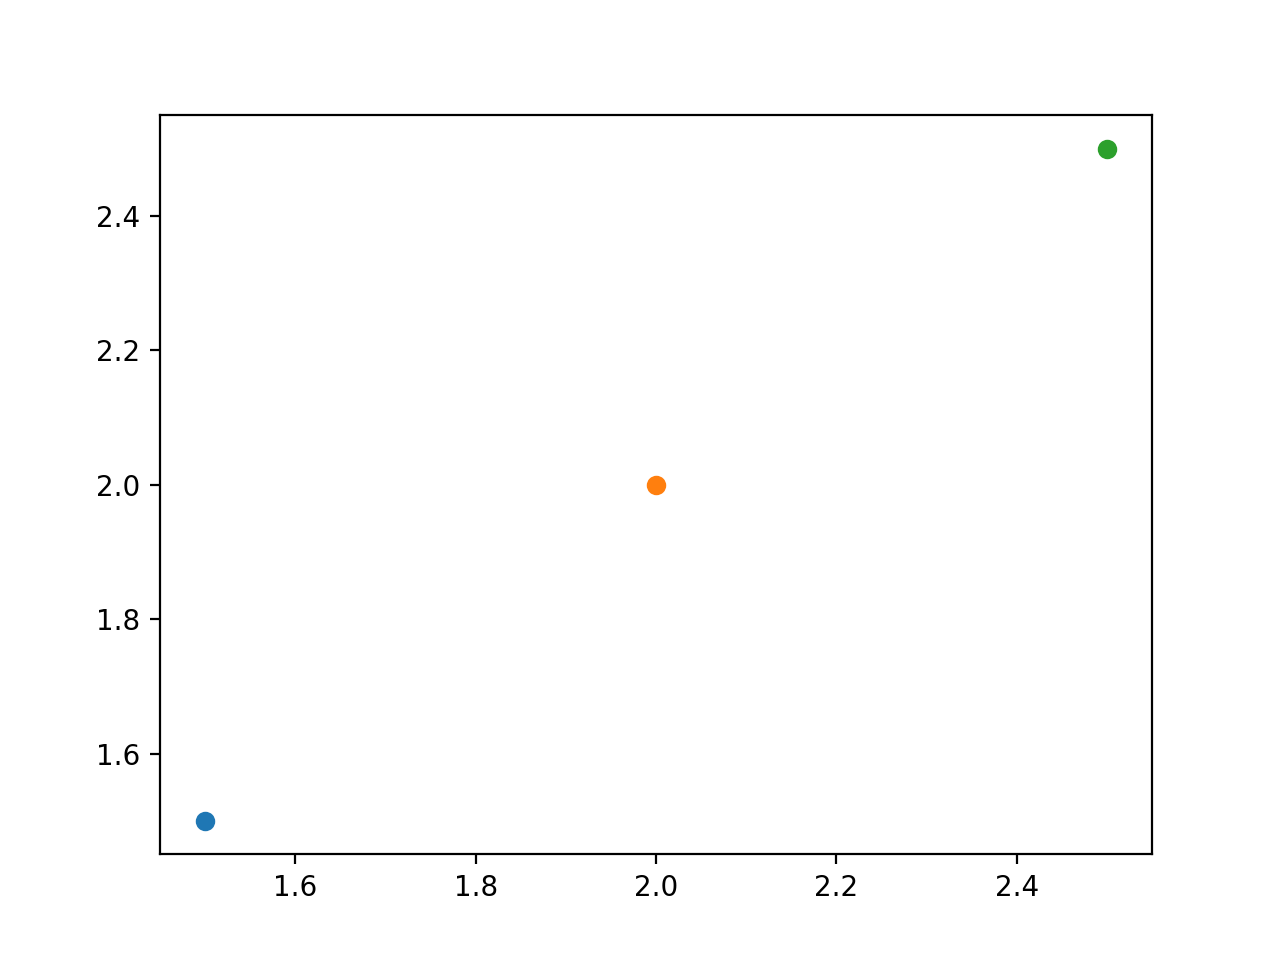

In [14]:
plt.figure()
plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')


#### get all of the child objects that the axes contain
.get_children()

In [15]:
ax = plt.gca()
ax.get_children()


 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

# 2.3 Scatterplots

plt.scatter()

<IPython.core.display.Javascript object>


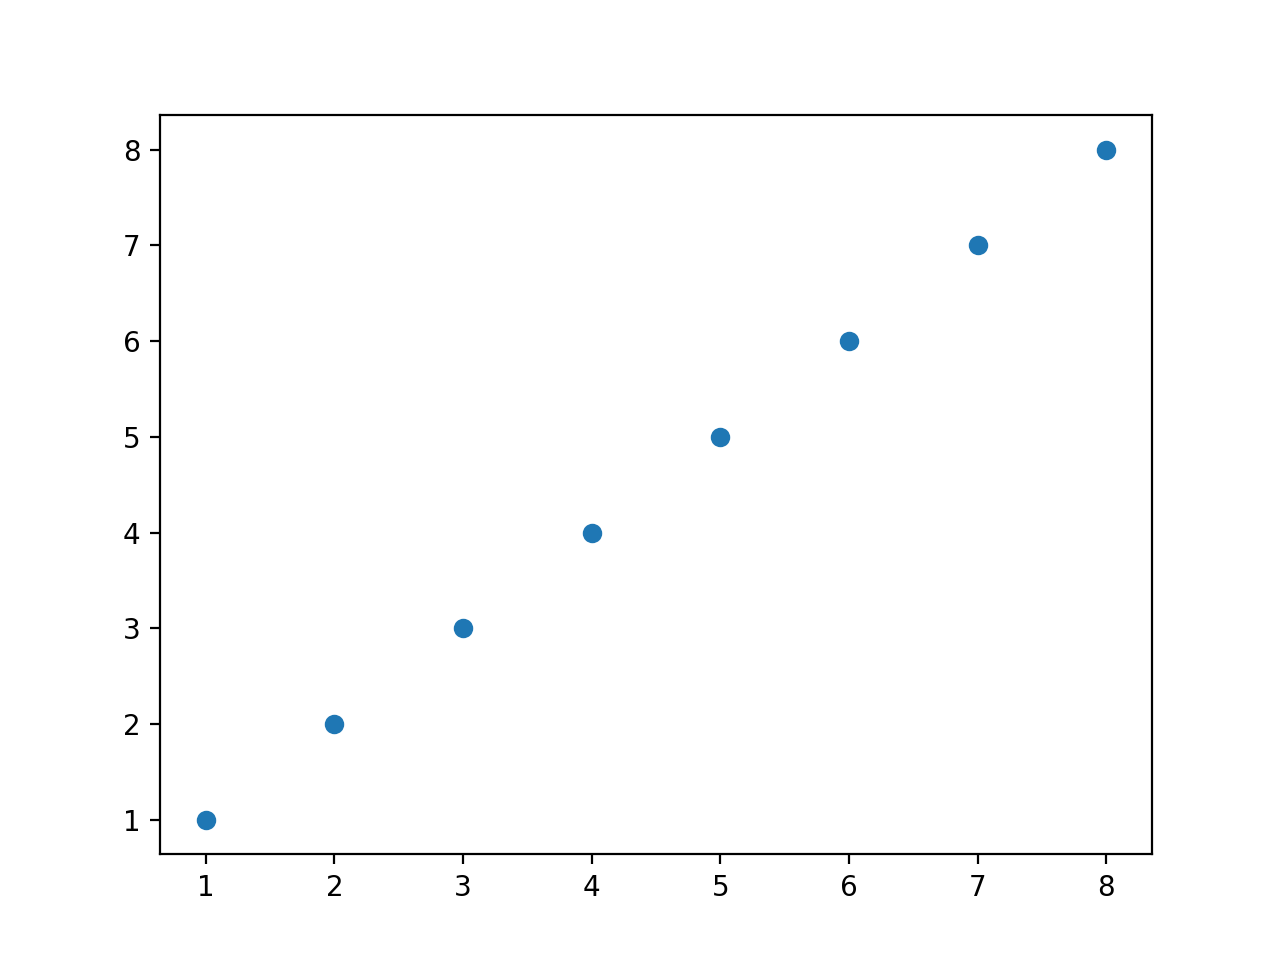

In [16]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

plt.figure()
plt.scatter(x, y)


<IPython.core.display.Javascript object>


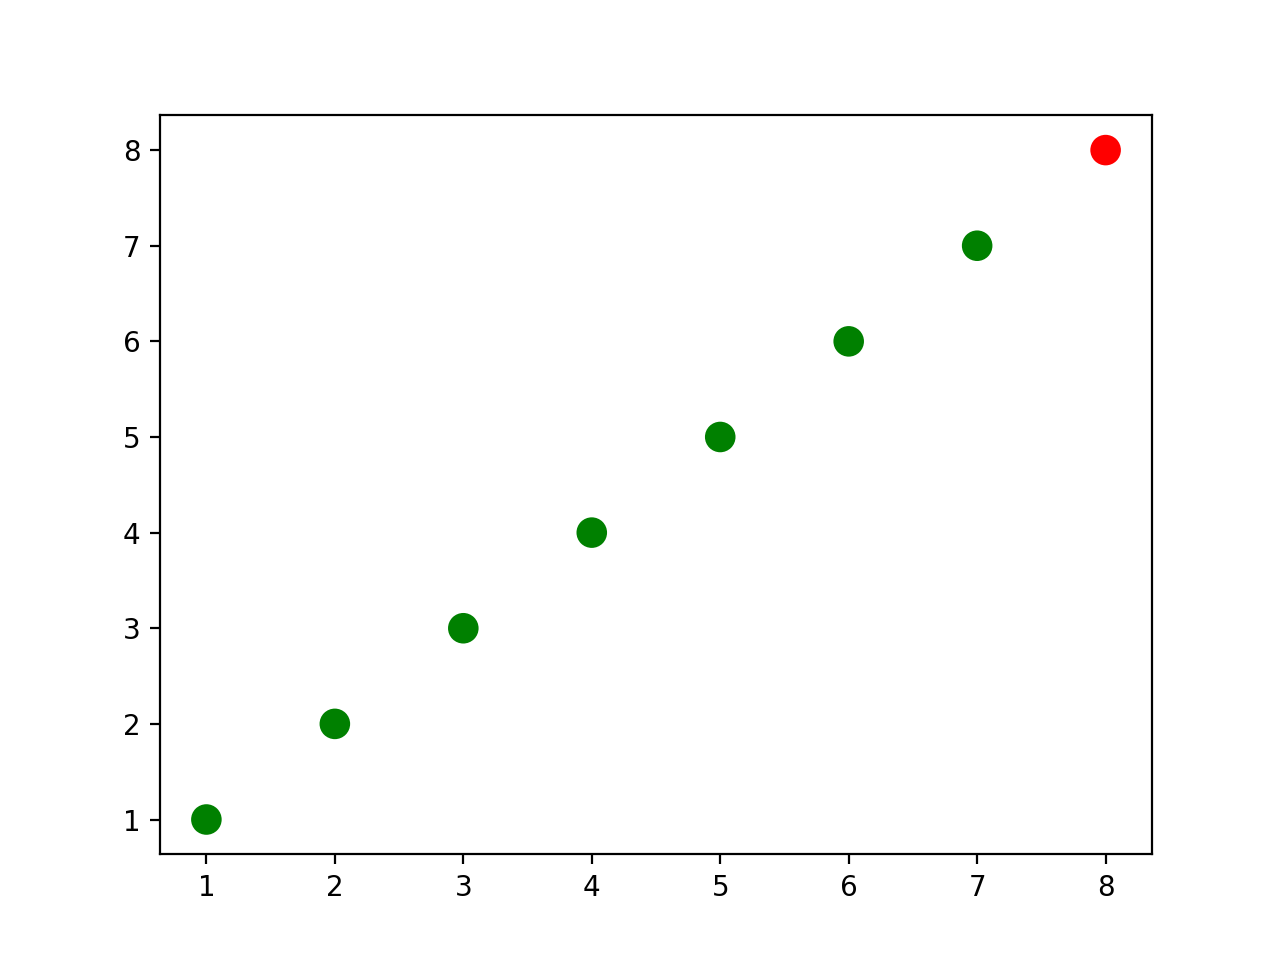

In [17]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

colors = ['green'] * (len(x) - 1)
colors.append('red')

plt.figure()
plt.scatter(x, y, s = 100, c = colors)


#### Recall the zip() function

In [18]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
list(zip_generator)


[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [21]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
x, y = zip(*zip_generator)

print(x)
print(y)


(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


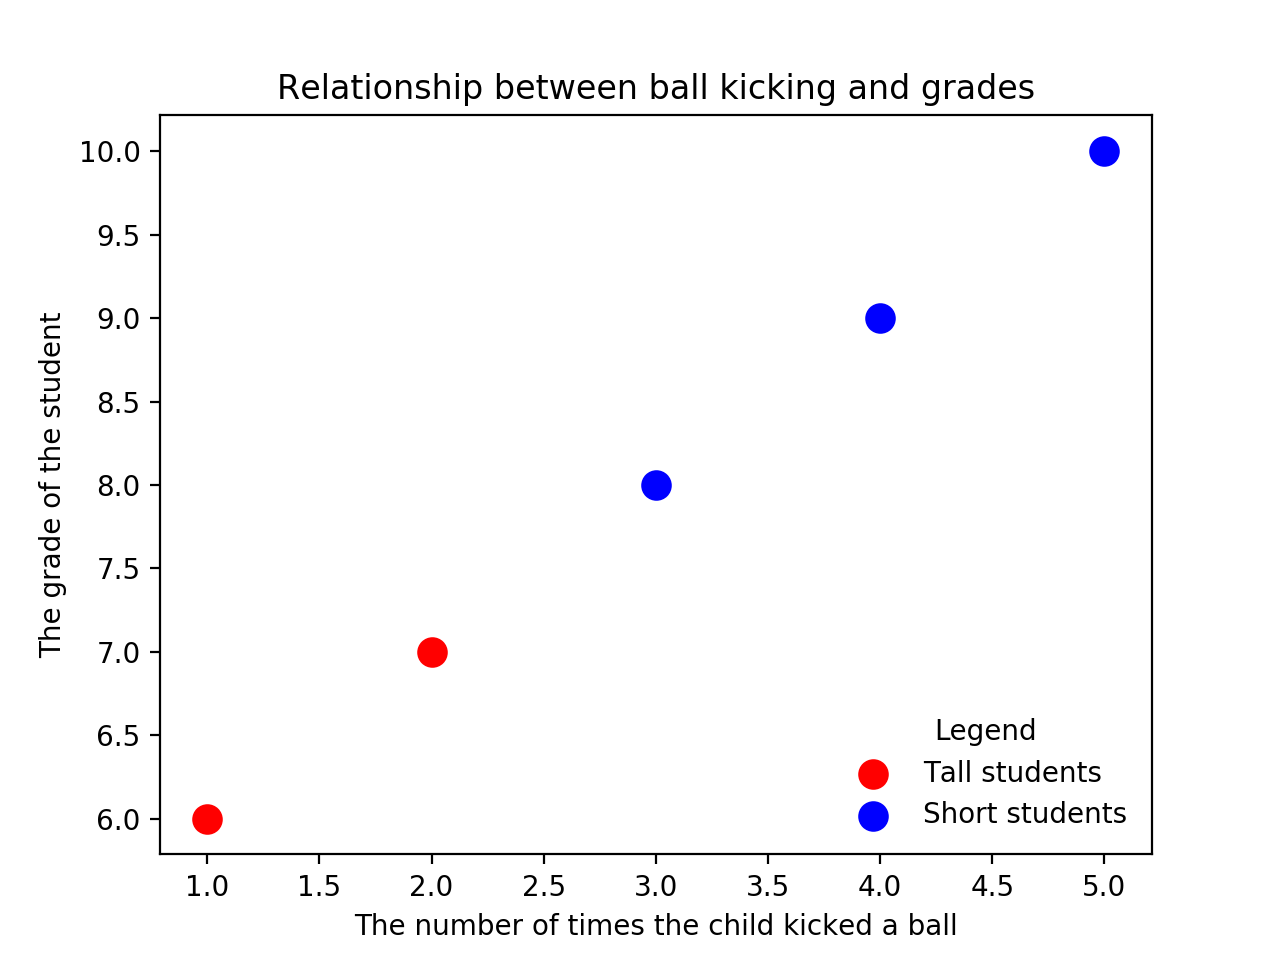

In [23]:
plt.figure()
plt.scatter(x[:2], y[:2], s = 100, c = 'red', label = 'Tall students')
plt.scatter(x[2:], y[2:], s = 100, c = 'blue', label = 'Short students')


#### Properties of Axis

- the axis generally have labels to them to explain what they represent or the units they describe

#### Charts tend to have titles, so let's put them in place

In [24]:
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')   # the graph above is updated!


Text(0.5, 1, 'Relationship between ball kicking and grades')

In [25]:
plt.legend()   # adding a legend


In [26]:
plt.legend(loc = 4, frameon = False, title = 'Legend')  # changing the location of the legend


In [27]:
plt.gca().get_children()


 Text(0.5, 1, 'Relationship between ball kicking and grades'),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

In [28]:
legend = plt.gca().get_children()[-2]


In [29]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()


In [30]:
from matplotlib.artist import Artist

def rec_gc(art, depth = 0):
    if isinstance(art, Artist):
        print("  " * depth + str(art))
        
        for child in art.get_children():
            rec_gc(child, depth + 2)
            
rec_gc(legend)  # We can see the legend artist is just made up of a number of different
                # offsetboxes for drawing, as well as TextAreas and PathCollections.


Legend
            Text(0, 0, 'Legend')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((833.986, 119.489), width=304.125, height=134)


# 2.4 Line Plots

plt.plot()

<IPython.core.display.Javascript object>


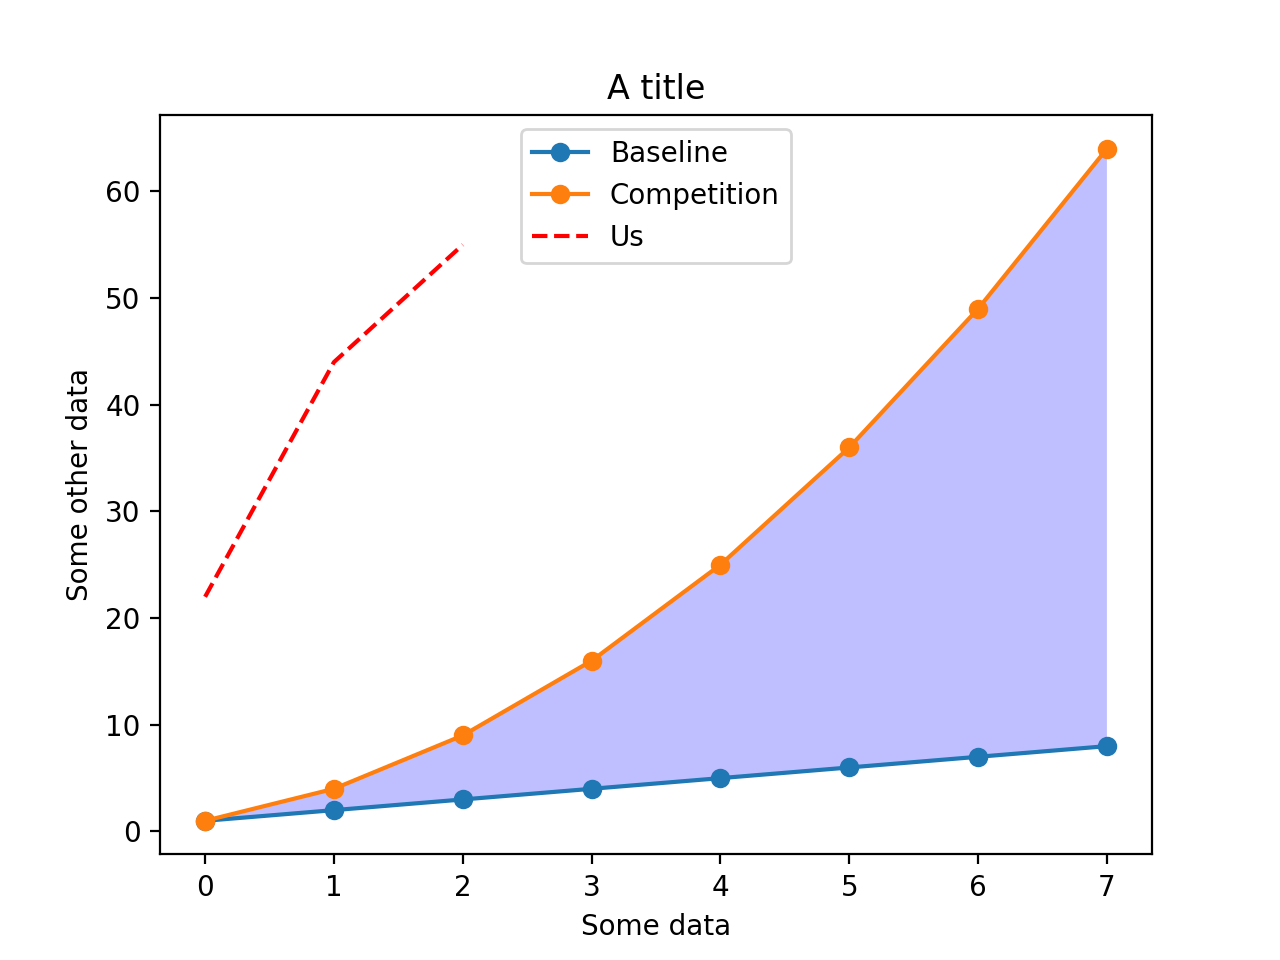

In [32]:
import numpy as np

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
quadratic_data = linear_data ** 2


plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')


In [33]:
plt.plot([22, 44, 55], '--r')


In [35]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])


#### .fill_between()

In [36]:
plt.gca().fill_between(range(len(linear_data)),
                       linear_data, quadratic_data,
                       facecolor = 'blue',
                       alpha = 0.25)


#### Another example:

<IPython.core.display.Javascript object>


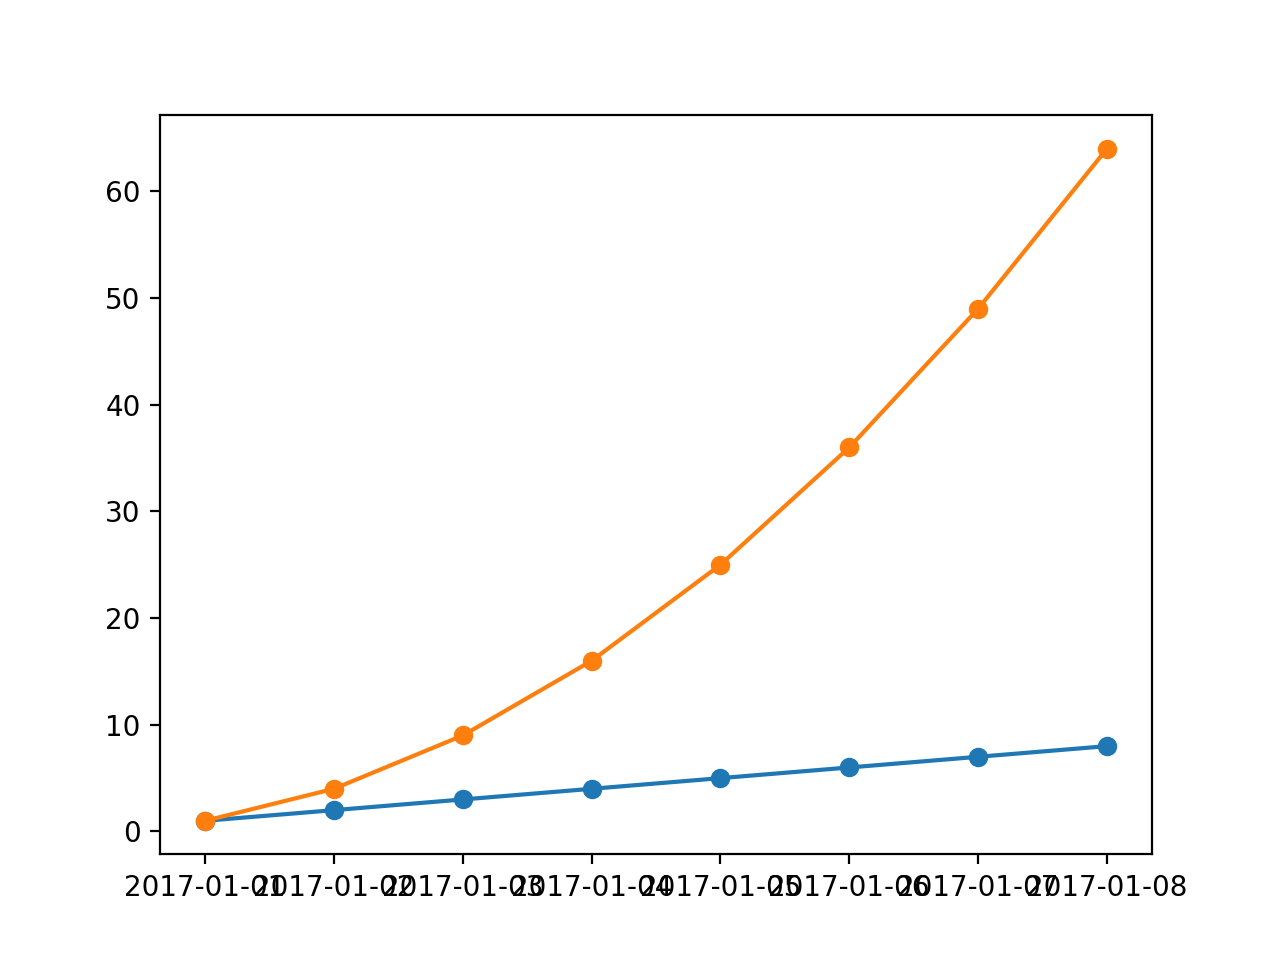

In [38]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')


<IPython.core.display.Javascript object>


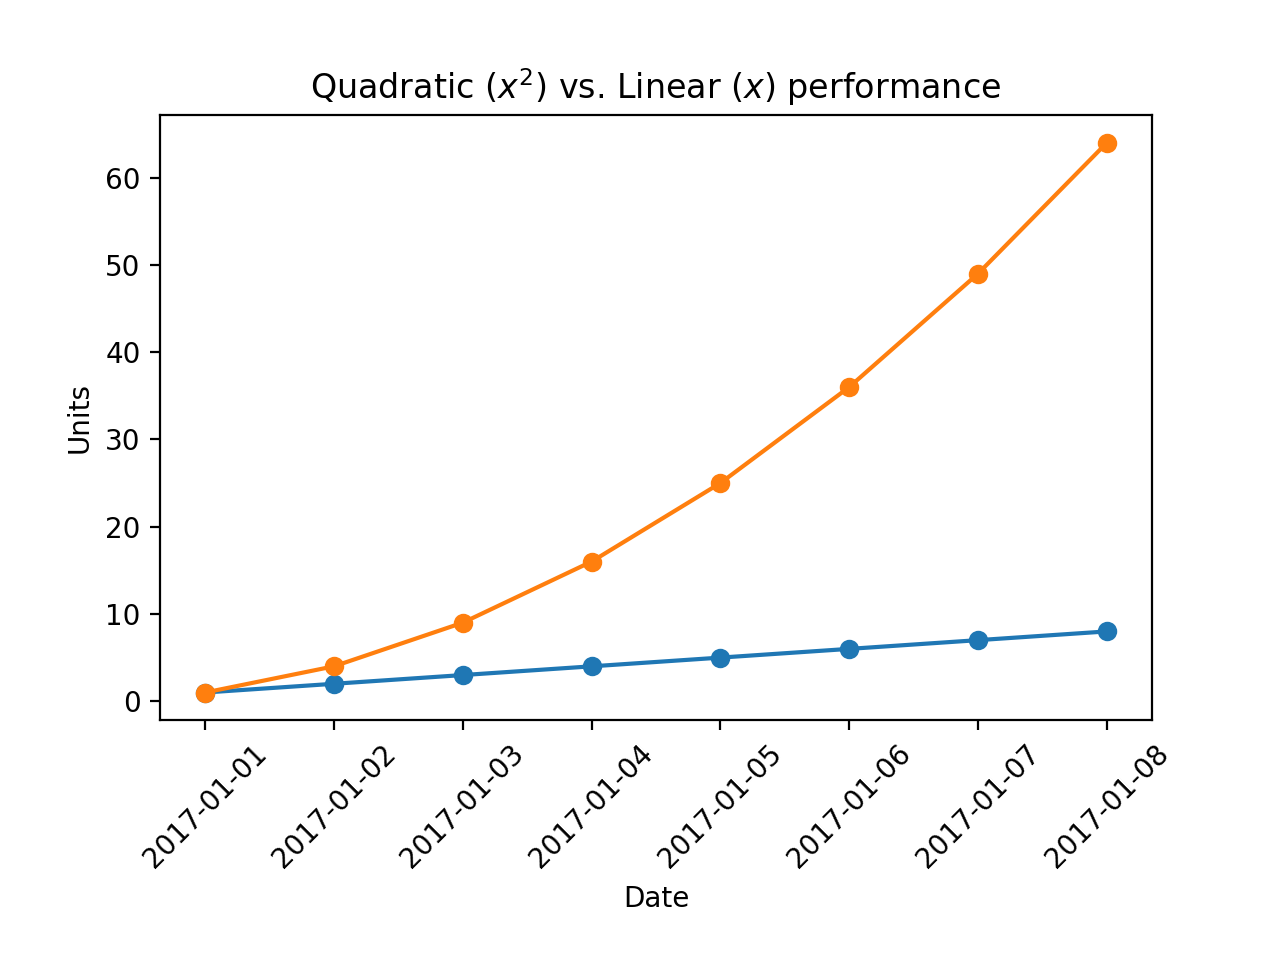

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [41]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')


#### .get_ticklables()
#### .set_rotation()

In [43]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)
    

In [44]:
plt.subplots_adjust(bottom = 0.25)


#### LaTex with $ signs

In [45]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic vs. Linear performance')


Text(0.5, 1, 'Quadratic vs. Linear performance')

In [46]:
ax.set_title("Quadratic ($x^2$) vs. Linear ($x$) performance")


Text(0.5, 1, 'Quadratic ($x^2$) vs. Linear ($x$) performance')

# 2.5 Bar Charts

plt.bar()

<IPython.core.display.Javascript object>


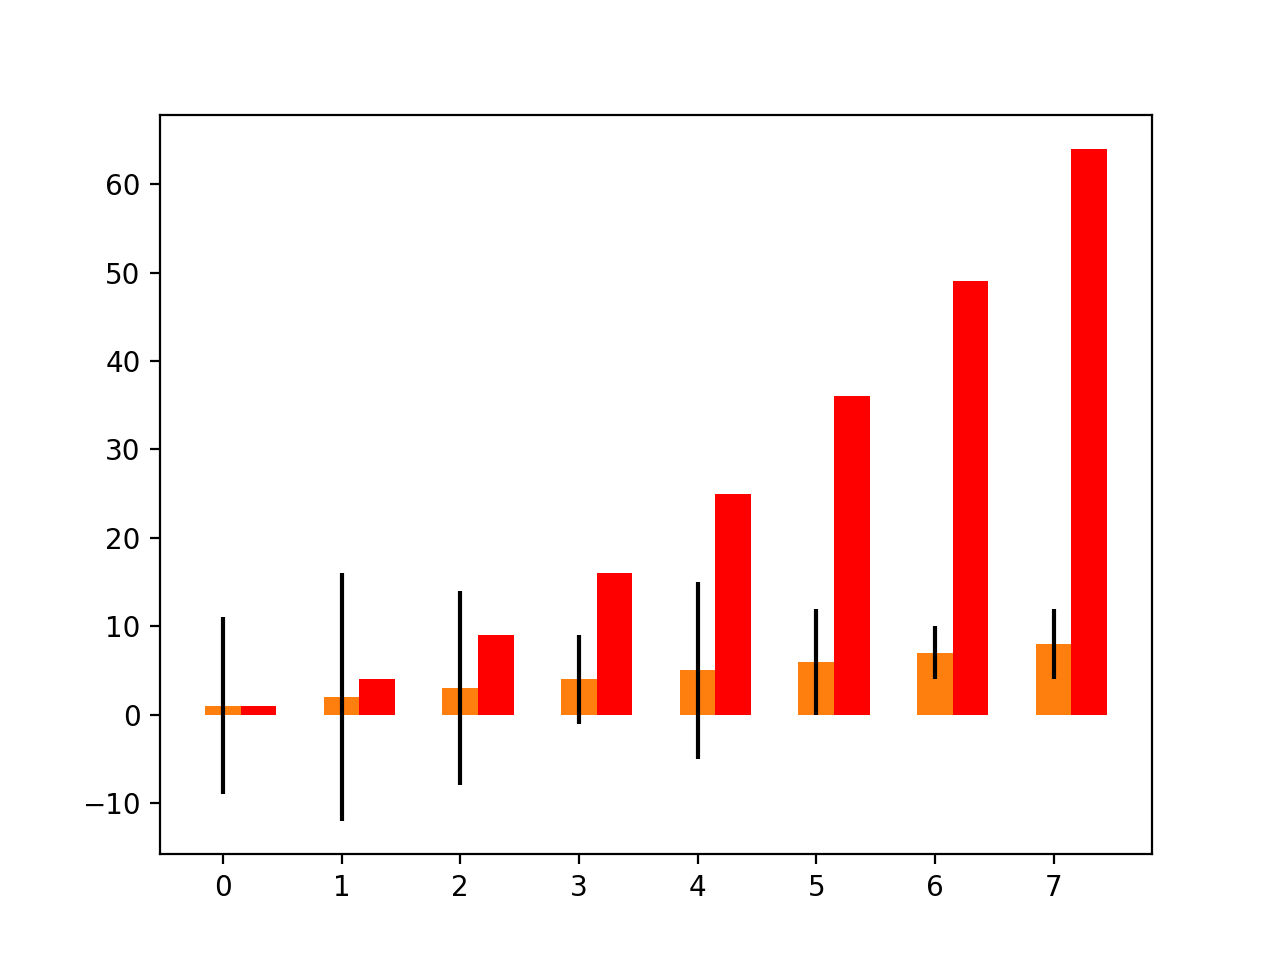

<BarContainer object of 8 artists>

In [47]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)


In [48]:
new_xvals = [ ]    # we need to adjust the x component to make up for the first bar we plotted
for item in xvals:
    new_xvals.append(item + 0.3)
    
plt.bar(new_xvals, quadratic_data, width = 0.3, color = 'red')


<BarContainer object of 8 artists>

In [49]:
from random import randint
linear_err = [randint(0, 15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width = 0.3, yerr = linear_err)


<BarContainer object of 8 artists>

#### Stacked bar chart

<IPython.core.display.Javascript object>


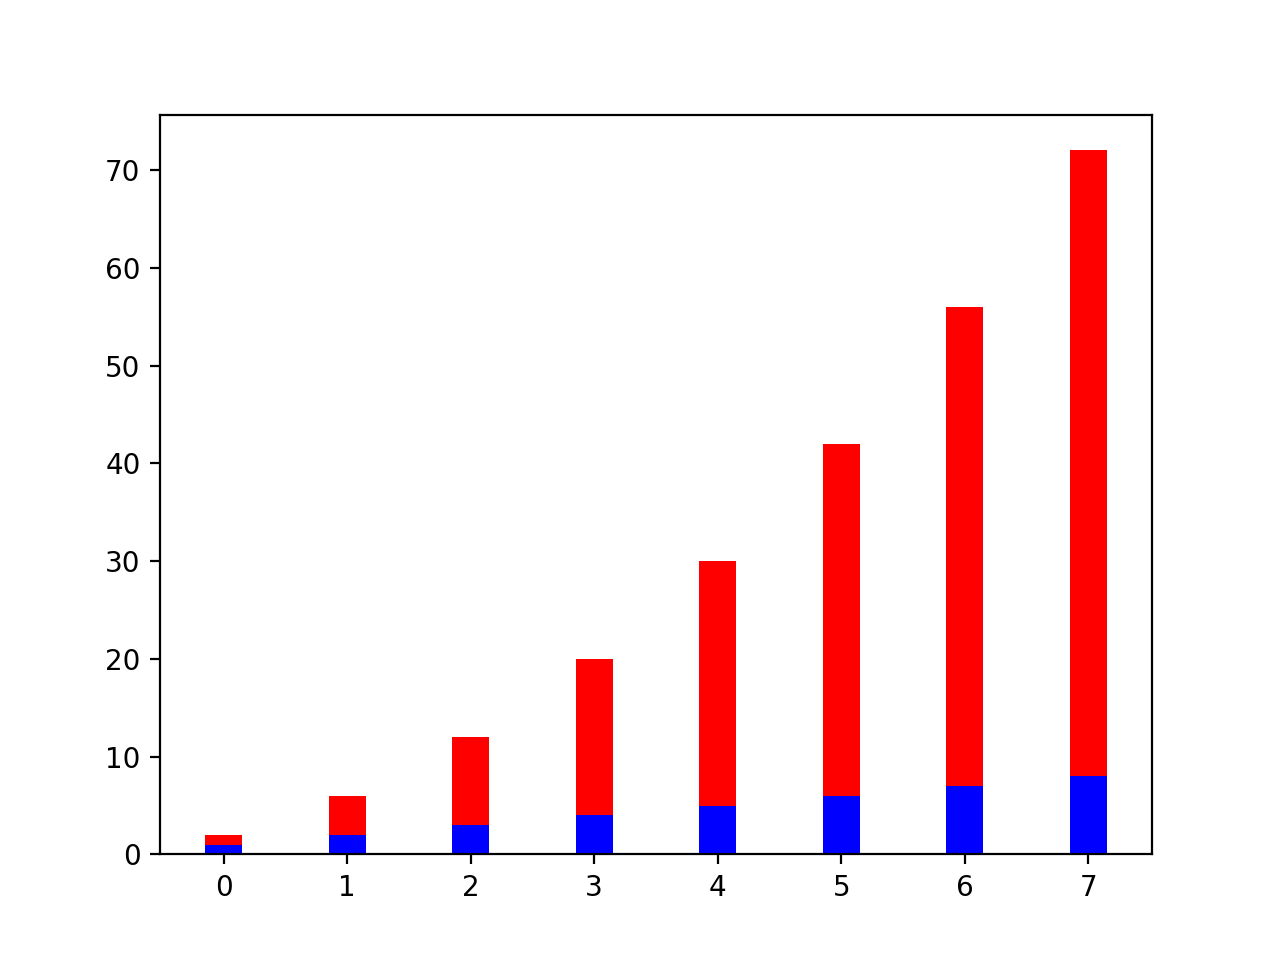

<BarContainer object of 8 artists>

In [50]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color = 'b')
plt.bar(xvals, quadratic_data, width = 0.3, bottom = linear_data, color = 'r')


plt.barh()

<IPython.core.display.Javascript object>


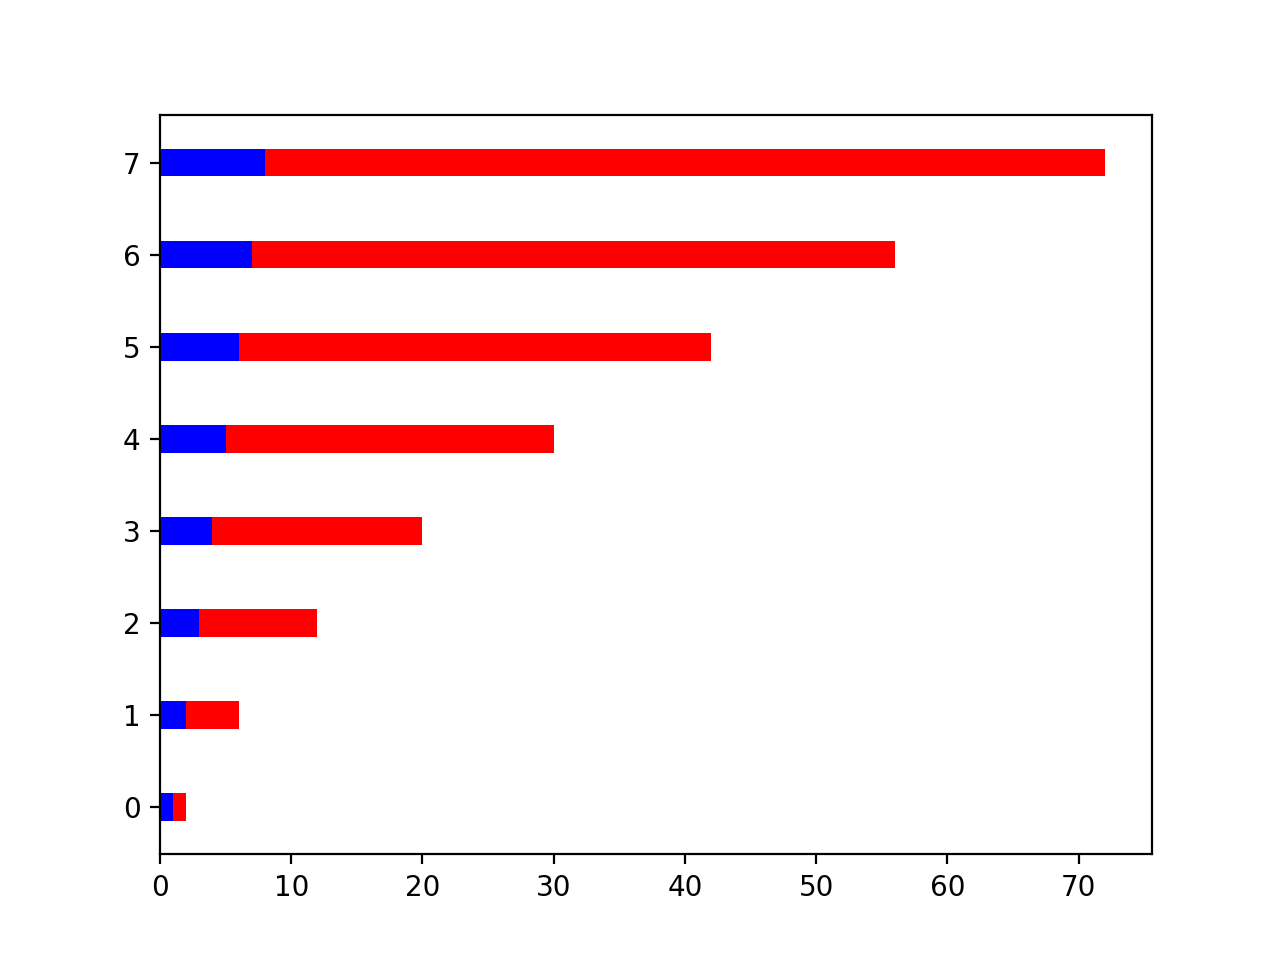

<BarContainer object of 8 artists>

In [51]:
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color = 'b')
plt.barh(xvals, quadratic_data, height = 0.3, left = linear_data, color = 'r')


# 2.6 Dejunkifying a Plot

plot.show()

<IPython.core.display.Javascript object>


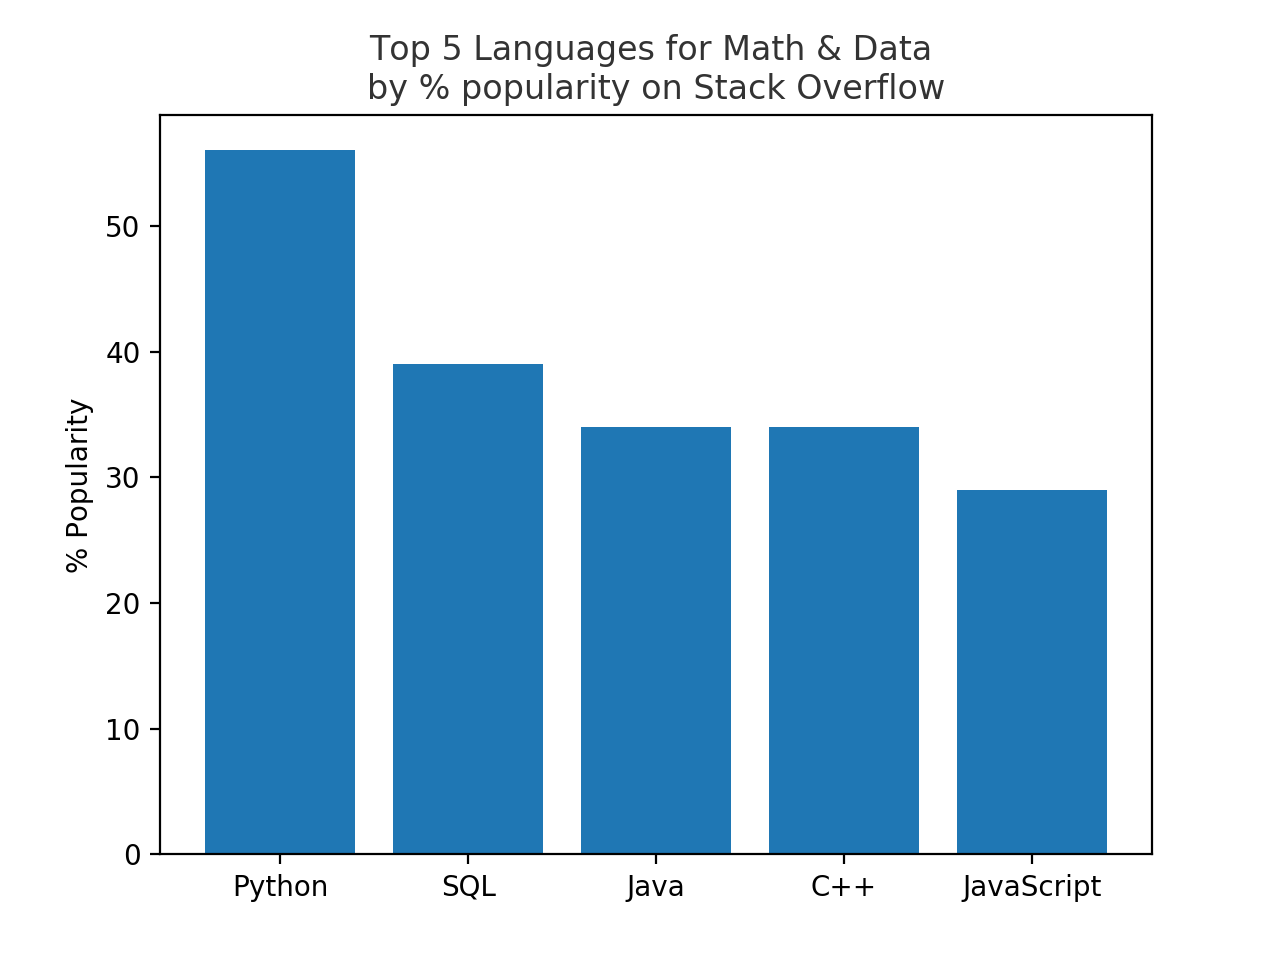

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align = 'center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha = 0.8)

plt.show()


<IPython.core.display.Javascript object>


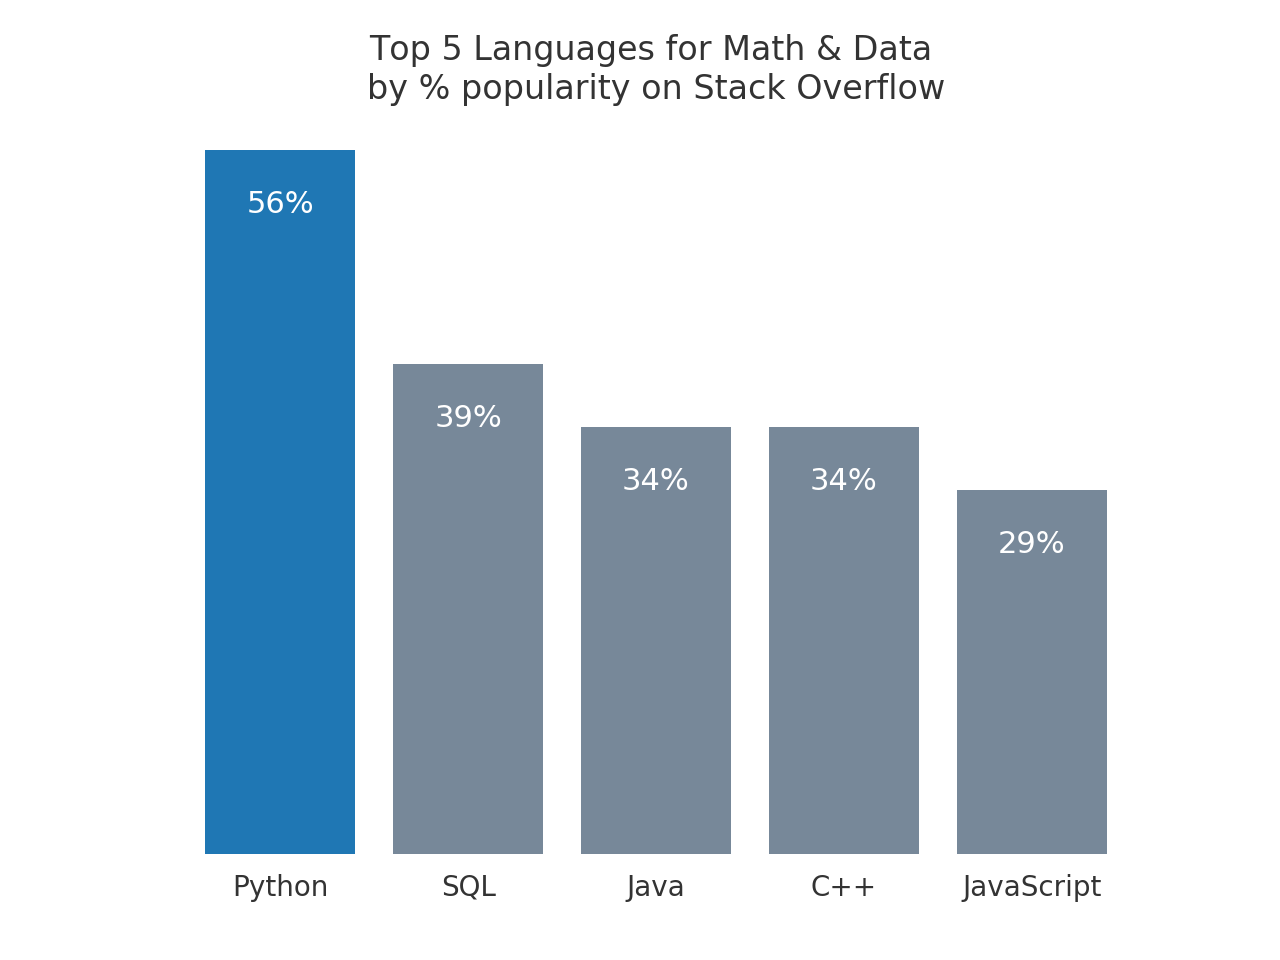

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less birght Blue
bars = plt.bar(pos, popularity, align = 'center', linewidth = 0, color = 'lightslategrey')
# make one bar, the python bar, a constrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha = 0.8)


# plt.ylabel('% Popularity', alpha = 0.8)       # remove the Y label since bars are directly labeled
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha = 0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = False, labelbottom = True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%',
                   ha = 'center', color = 'w', fontsize = 11)
    
plt.show()
